In [2]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = 'D:/vivos/train/waves/VIVOSSPK01/VIVOSSPK01_R001.wav'

1. Biễu diễn âm thanh dưới dạng speech signal, có 2 chiều (x,y) với x: thời gian, y: biên độ, sr: tốc độ mặc định của librosa, 22050hz

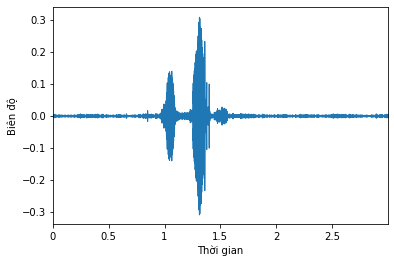

In [4]:
#waves_form
signal, sr = librosa.load(file_path, sr= 22050) 
librosa.display.waveplot(signal, sr= sr)
plt.xlabel('Thời gian')
plt.ylabel('Biên độ')
plt.show()

2. Biến đổi speech signal thành âm phổ (spectrum), sử dụng phép biến đổi fourier,có dạng 2 chiều (x',y'),x':tần số(hz),y':cường độ(dB)

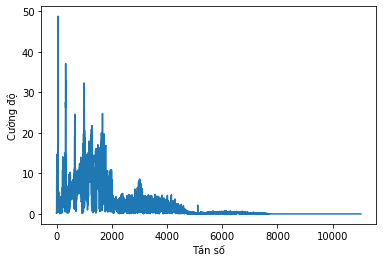

In [5]:
# fft -> spectrum
fft = np.fft.fft(signal) # phép biến đổi fourier
magnitude = np.abs(fft) # cường độ
frequency = np.linspace(0, sr, len(magnitude)) # tần số
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel('Tần số')
plt.ylabel('Cường độ')
plt.show()

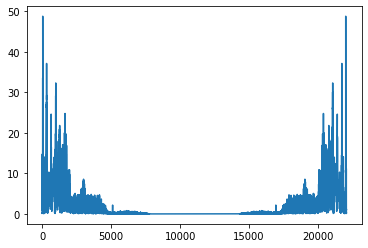

In [6]:
plt.plot(frequency, magnitude)

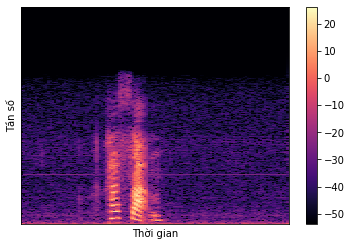

In [8]:
# sfft -> spectrogram - short-time fourier transform
n_fft = 2048 # giá trị mặc định có 2048 mẫu ứng với tốc độ mẫu 22050hz
hop_length = 512 # số lượng mẫu audio giữa các cột liền kề, giá trị 512 đối với giọng nói

stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel('Thời gian')
plt.ylabel('Tần số')
plt.colorbar()
plt.show()
# ở đây ta thấy 2 vùng sáng là energy, vùng nhấn tại lúc nói

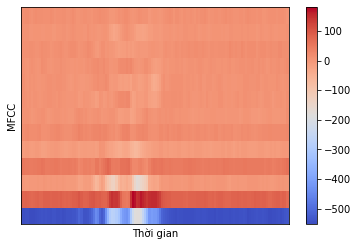

In [9]:
# MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)
librosa.display.specshow(MFCCs, sr = sr, hop_length = hop_length)
plt.xlabel('Thời gian')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

In [12]:
# mean_normalized MFCCs
MFCCs -= np.mean(MFCCs, axis=0) + 1e-8)

SyntaxError: invalid syntax (<ipython-input-12-d9d3612d4d3d>, line 2)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-545.796326,-547.530640,-544.896362,-545.078918,-552.414795,-552.201416,-550.311951,-548.308350,-546.406250,-544.151123,...,-550.916504,-552.023804,-549.821960,-548.713135,-545.952271,-544.385193,-547.743225,-544.006531,-537.899719,-535.419128
1,84.057320,81.179626,83.719101,83.471741,80.036621,77.122925,78.606842,81.397354,83.793594,79.757462,...,75.495125,77.807030,83.020889,84.527817,86.617630,86.988663,83.188408,87.779037,86.287094,70.199425
2,3.680611,0.232088,-2.572562,-3.171912,-1.928863,-1.653968,0.036678,-1.941429,1.987768,0.088003,...,-1.225319,-2.752381,-4.760156,-1.573229,1.756370,4.730430,1.415966,3.452662,1.984683,2.127165
3,59.866703,54.690681,50.073357,49.361618,46.991871,48.410667,52.036240,51.509171,54.189659,54.684849,...,50.721832,48.278900,42.755398,44.999363,47.621338,50.728031,48.438507,52.920540,57.573658,62.994720
4,-3.925914,-5.687540,-5.114876,-3.201705,-7.498389,-9.387348,-5.667524,-4.946055,-4.366498,-7.494227,...,-6.789631,-5.027207,-6.751322,-5.286824,-5.620143,-5.971341,-3.570627,-1.529377,-1.564804,-0.454045
5,18.573521,19.271708,22.982458,25.160633,20.173592,17.831379,19.583286,19.696815,23.129951,23.643612,...,23.404263,24.744968,22.174366,22.429691,21.691883,21.784304,26.248522,23.618879,23.656311,26.927174
6,11.671095,9.820091,10.325121,9.359938,6.554937,2.527877,4.637307,8.807543,9.386351,9.904030,...,6.980000,7.099148,2.017436,2.980354,2.880004,2.023439,6.151558,5.173503,4.997583,16.873384
7,13.836233,13.534545,9.425158,8.404999,9.297472,4.725133,9.181967,9.114031,6.202994,5.891262,...,10.289746,6.878098,0.094390,4.899508,7.403668,8.935150,9.647346,6.353862,4.811294,12.626579
8,15.901552,13.634584,6.907366,4.899108,9.554391,7.517219,9.144907,6.310230,3.588046,4.733295,...,7.336628,8.916817,6.231465,7.727404,12.179781,11.841061,6.189052,5.934134,6.735964,10.360854
9,12.071101,11.505932,6.592860,4.549064,11.077014,14.686213,11.753144,7.487981,3.830195,8.908029,...,8.010112,12.132046,11.109074,9.074324,12.673478,14.924419,11.115469,10.914249,12.901358,17.798372
